In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

from keras.models import load_model


from keras.layers import LSTM, GRU, Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

In [2]:
import socket 

IP = '127.0.0.1'
Sender_Receiver_comm_port = 9998

sender_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM) 
sender_socket.connect((IP, Sender_Receiver_comm_port)) 

def start_sending_packets(send_Data):
    packet = "%d"%send_Data
    sender_socket.send( repr(packet).encode()) 
    data = sender_socket.recv(1024) 
    print('Packet sent to the receiver :',repr(data.decode("utf-8"))) 
    

# Train AI model with already extracted dataset

In [3]:
LR = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/LR_100/*.csv')
RL = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/RL_100/*.csv')
UP = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/UP_100/*.csv')
Down = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/Down_100/*.csv')
#CW = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CW_100/*.csv')
#CCW = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CCW_100/*.csv')
#LRRL = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CCW_100/*.csv')
BA = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/BA_100/*.csv')
DA = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/DA_100/*.csv')

AD = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/AD_100/*.csv')
AB = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/AB_100/*.csv')
CD = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CD_100/*.csv')
CB = glob.glob('C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/CB_100/*.csv')

len(LR), len(RL), len(UP), len(Down), len(BA), len(DA), len(AD), len(AB), len(CD), len(CB)

(100, 100, 100, 100, 100, 100, 100, 100, 100, 100)

In [4]:
total_data = LR + RL + UP + Down + BA + DA + AD + AB + CD + CB
dataset = np.zeros((len(total_data), 100, 4))

len(dataset), len(total_data) #dataset[0], 

(1000, 1000)

In [5]:
for i, data in enumerate(total_data):
    tmp = pd.read_csv(data, names=['n','a','b','c','d']).sample(n=100, replace=True).sort_index().iloc[:,1:5]
    dataset[i] = tmp
    
label = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(LR) + [[0, 1, 0 ,0, 0, 0, 0, 0, 0, 0]] * len(RL) 
                 + [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]] * len(UP) + [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]] * len(Down) 
                 + [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]] * len(BA) + [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]] * len(DA) 
                 + [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]] * len(AD) + [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]] * len(AB) 
                 + [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] * len(CD) + [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] * len(CB) )
dataset.shape, label.shape

((1000, 100, 4), (1000, 10))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state=0, test_size=0.3)

callback = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001), 
    ModelCheckpoint(filepath='./weights.h5', save_best_only=True),
    EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=5)
]

In [7]:
K.clear_session()
model_once = 0

In [8]:
model_once = Sequential()
model_once.add(GRU(20, input_shape=(100,4)))
model_once.add(Dense(32,activation='relu')) 
model_once.add(Dense(128,activation='relu')) 
model_once.add(Dense(64,activation='relu')) 
model_once.add(Dense(10, activation='softmax'))
model_once.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['acc'])

result = model_once.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10, verbose=1)
#result = model_once.fit(X_train, y_train, epochs=35, verbose=2)

Epoch 1/30
47/47 [==============================] - 2s 24ms/step - loss: 2.3112 - acc: 0.1047 - val_loss: 2.2633 - val_acc: 0.1250
Epoch 2/30
47/47 [==============================] - 1s 19ms/step - loss: 2.2634 - acc: 0.1389 - val_loss: 2.2006 - val_acc: 0.1638
Epoch 3/30
47/47 [==============================] - 1s 19ms/step - loss: 2.1842 - acc: 0.1581 - val_loss: 2.1650 - val_acc: 0.1207
Epoch 4/30
47/47 [==============================] - 1s 18ms/step - loss: 2.0490 - acc: 0.1944 - val_loss: 1.9409 - val_acc: 0.1940
Epoch 5/30
47/47 [==============================] - 1s 19ms/step - loss: 1.6485 - acc: 0.3675 - val_loss: 1.1910 - val_acc: 0.5603
Epoch 6/30
47/47 [==============================] - 1s 19ms/step - loss: 0.7540 - acc: 0.7244 - val_loss: 0.6288 - val_acc: 0.8147
Epoch 7/30
47/47 [==============================] - 1s 19ms/step - loss: 0.2830 - acc: 0.9209 - val_loss: 0.4048 - val_acc: 0.8707
Epoch 8/30
47/47 [==============================] - 1s 18ms/step - loss: 0.2284 - a

In [9]:
model_once.evaluate(X_test, y_test)

predict_x=model_once.predict(X_test) 
classes_x_test=np.argmax(predict_x,axis=1)

10/10 [==============================] - 0s 6ms/step - loss: 0.0444 - acc: 0.9900


In [10]:
classes_y_test = []
for i in range(len(y_test)):
    for j in range(10):  #num class 
        if y_test[i][j] == 1:
            classes_y_test.append(j)

count=0
print("Real value : Prediction\n---------------------------")
for i in range(len(X_test)):
    if(classes_x_test[i] != classes_y_test[i]):
        print("   ",classes_y_test[i], "\t   : \t", classes_x_test[i])
        
        count = count + 1
probab = count/len(X_test)
print("\n\nNumber of miscalculation : ",count,"/",len(classes_x_test),"=",round(probab,3))
print("\nAccuracy : ",((1-round(probab,4))*100),"%")
print("0 : LR, 1 : RL, 2 : UP, 3 : DOWN, 4: Left to Down, 5: Right to Down, 6: Down to Right, 7: Down to Left, 8: Up to Right, 9: Up to Left")

Real value : Prediction
---------------------------
    0 	   : 	 1
    6 	   : 	 0
    5 	   : 	 6


Number of miscalculation :  3 / 300 = 0.01

Accuracy :  99.0 %
0 : LR, 1 : RL, 2 : UP, 3 : DOWN, 4: Left to Down, 5: Right to Down, 6: Down to Right, 7: Down to Left, 8: Up to Right, 9: Up to Left


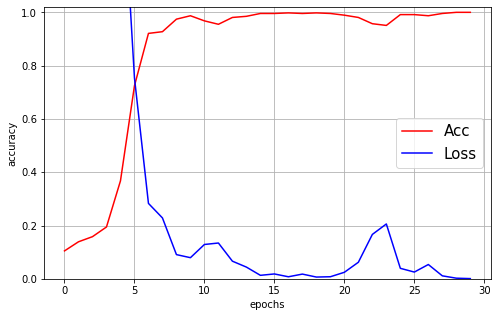

In [11]:
plt.figure(figsize=(8,5))
val_loss = result.history['loss']
val_acc = result.history['acc']

plt.plot(val_acc, label='Acc', color='red')
plt.plot(val_loss, label='Loss', color='blue')

plt.ylim(0,1.02)
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(fontsize=15)
plt.show()

# Real-time Dection & gesture classification 

In [12]:
import sys, serial, argparse, time
import os
import scipy
from scipy import signal
from collections import deque

### Deleting Serial Comm.

In [ ]:
del ser

In [13]:
ser = serial.Serial(
    port='com3',
    baudrate=19200,
)

In [14]:
def start_sensing_threshold(signal_lst, threshold, idx):
    outcome = False
    
    if signal_lst[idx - 1] > threshold:  #현재 데이터
        if signal_lst[idx - 2] < threshold:   #바로 전 데이터
            outcome = True
        else:
            pass

    return outcome
        
def end_sensing_threshold(signal_lst, threshold, idx):
    outcome = False
    
    if signal_lst[idx - 1] < threshold:  #현재 데이터
        if signal_lst[idx - 2] > threshold:   #바로 전 데이터
            outcome = True
        else:
            pass

    return outcome

def Classification_print(result):
    if result == 0:
        print("Classification Result is Hand Motion Gesture Type 0")
    
    if result == 1:
        print("Classification Result is Hand Motion Gesture Type 1")
    
    if result == 2:
        print("Classification Result is Hand Motion Gesture Type 2")
        
    if result == 3:
        print("Classification Result is Hand Motion Gesture Type 3")
        
    if result == 4:
        print("Classification Result is Hand Motion Gesture Type 4")
        
    if result == 5:
        print("Classification Result is Hand Motion Gesture Type 5")
        
    if result == 6:
        print("Classification Result is Hand Motion Gesture Type 6")
        
    if result == 7:
        print("Classification Result is Hand Motion Gesture Type 7")
    
    if result == 8:
        print("Classification Result is Hand Motion Gesture Type 8")
        
    if result == 9:
        print("Classification Result is Hand Motion Gesture Type 9")
                
        

In [23]:
sensor1, sensor2, sensor3, sensor4, index  = [], [], [], [], []
init_time = 6  #sec
window_size, Sampling_freq = 19, 53

init_period = Sampling_freq * init_time
Threshold = 21
hand_motion_period = 53

front_period, back_period = 50, 70

In [24]:
init_s1, init_s2, init_s3, init_s4, idx = [], [], [], [], 0
print("First Initialization")

for i in range(1,5):
    globals()['Test_threshold{}'.format(i)] = []

for i in range(100): #처음 100개 데이터는 거름
    tmp = ser.readline()

for i in range(int(init_period)):
    tmp = ser.readline()
    s1, s2, s3, s4 = tmp.decode()[:5], tmp.decode()[6:11], tmp.decode()[12:17], tmp.decode()[18:]

    try:
        s1, s2, s3, s4 = (int(s1)-10000), (int(s2)-10000), (int(s3)-10000), (int(s4)-10000)
    
    except:
        print("Error at index ", i)
        pass
    
    if type(s1) == int and type(s2) == int and type(s3) == int and type(s4) == int: 
        index.append(idx)
        idx = idx + 1
        
        for j in range(1,5):
            globals()['Test_threshold{}'.format(j)].append(0)
            globals()['init_s{}'.format(j)].append(globals()['s{}'.format(j)])
            globals()['sensor{}'.format(j)].append(globals()['s{}'.format(j)])

offset_s1, offset_s2, offset_s3, offset_s4 = np.mean(init_s1), np.mean(init_s2), np.mean(init_s3), np.mean(init_s4)
init_s1, init_s2, init_s3, init_s4 = [], [], [], []

First Initialization


## Real Time operation 

In [25]:
for i in range(1,5):
    globals()['sensor{}_frame'.format(i)] = []  
    globals()['S{}_Threshold'.format(i)], globals()['s{}_start_frame'.format(i)], globals()['s{}_end_frame'.format(i)] = Threshold, 0, 0
    globals()['s{}_cnt'.format(i)], globals()['s{}_safe_cnt'.format(i)], globals()['s{}_safe_cnt_2'.format(i)] = 0, 0, 0
    
Final_frame, safe_cnt3, start_frame, start_frame_tmp, end_frame, end_frame_tmp, next_frame_period, cnt = [], 0, 0, 0, 0, 0, 0, 0

while True:
    if ser.readable():
        res = ser.readline()
        s1, s2, s3, s4 = res.decode()[:5], res.decode()[6:11], res.decode()[12:17], res.decode()[18:]
                        
        try:
            s1, s2, s3, s4 = (int(s1)-10000), (int(s2)-10000), (int(s3)-10000), (int(s4)-10000)

        except:
            print(idx, " index has Error")
            pass
        
        if type(s1) == int and type(s2) == int and type(s3) == int and type(s4) == int: 
            index.append(idx)
            
            for i in range (1,5): 
                globals()['Test_threshold{}'.format(i)].append(globals()['S{}_Threshold'.format(i)])
                
                tmp2 = globals()['s{}'.format(i)] - globals()['offset_s{}'.format(i)]
                tmp2 = np.abs(np.round(tmp2,3))
                globals()['sensor{}'.format(i)].append(tmp2)
                
                if globals()['s{}_start_frame'.format(i)] == 0 and globals()['s{}_end_frame'.format(i)] == 0:  #안정해졌을 때 offset 계산해야 함
                    globals()['init_s{}'.format(i)].append(globals()['s{}'.format(i)])
                #-----------------------------------------------------------------------------------------------------------------------------------------
                
                if start_sensing_threshold(globals()['sensor{}'.format(i)], globals()['S{}_Threshold'.format(i)], idx) == True:  # Hand motion detection 시작
                    globals()['s{}_start_frame'.format(i)] = idx - 70 #period 설정, 약 20 = 0.4 초 정도 앞으로
                    globals()['s{}_safe_cnt_2'.format(i)] = globals()['s{}_safe_cnt_2'.format(i)] + 1
                    #print(i, " 센서 넘음", idx)
                
                elif globals()['sensor{}'.format(i)][idx] > globals()['S{}_Threshold'.format(i)]: # Hand motion detection 중간
                    globals()['s{}_cnt'.format(i)], globals()['s{}_safe_cnt'.format(i)] = (globals()['s{}_cnt'.format(i)] + 1), (globals()['s{}_safe_cnt'.format(i)] + 1)
                    
                elif end_sensing_threshold(globals()['sensor{}'.format(i)], globals()['S{}_Threshold'.format(i)], idx) == True and globals()['s{}_cnt'.format(i)] > 0 and globals()['s{}_safe_cnt_2'.format(i)] > 0:  # Hand motion detection 끝
                    globals()['s{}_end_frame'.format(i)] = idx + 70  #0.6초 정도 뒤로
                    #print(i, " 센서 넘었다가 다시 내려감", idx)
                    globals()['s{}_safe_cnt'.format(i)] = 0
                    
                elif globals()['s{}_start_frame'.format(i)] == 0 and globals()['s{}_end_frame'.format(i)] == 0: #False 일 때, end_Frame 끝나면 ㄱ
                    if idx % init_period == 0:  #매번 5초 마다 init 실행
                        globals()['offset_s{}'.format(i)] = np.mean(globals()['init_s{}'.format(i)])
                        idx_tmp = len(globals()['sensor{}'.format(i)])
                        globals()['S{}_Threshold'.format(i)] = np.mean(globals()['sensor{}'.format(i)][idx_tmp-50:idx_tmp]) + Threshold  #Th업데이트
                        globals()['init_s{}'.format(i)] = []  #offset 계산해주는 리스트 초기화
                        
                        #print(i," 센서 ", idx, " 번째 idx 에서 Init, Threshold 업데이트!!! : ", np.round(globals()['S{}_Threshold'.format(i)], 3))
                        print(i," Sensor, ", " Update Threshold : ", np.round(globals()['S{}_Threshold'.format(i)], 3))
                        
                if globals()['sensor{}'.format(i)][idx] > globals()['S{}_Threshold'.format(i)] and globals()['s{}_safe_cnt'.format(i)] > 50: # 안전장치: 계속 넘으면 다시 안내려감 = 1초 동안 넘으면 다시 내려감
                    print(i, " Sensor Saftey Measure! ")  #sensor 값에서 바로 추출
                    idx_tmp = len(globals()['sensor{}'.format(i)])
                    globals()['offset_s{}'.format(i)] = np.mean(globals()['sensor{}'.format(i)][idx_tmp-50:idx_tmp]) #offset 다시 설정
                    globals()['s{}_safe_cnt'.format(i)] = 0
                
                if idx == globals()['s{}_end_frame'.format(i)] and idx > 800:  #대략 맨 처음 8초 정도
                    #print(i," 센서 => 리스트에 저장")
                    globals()['sensor{}_frame'.format(i)].append([globals()['s{}_start_frame'.format(i)], globals()['s{}_end_frame'.format(i)]]) 
                    globals()['s{}_end_frame'.format(i)], globals()['s{}_start_frame'.format(i)], globals()['s{}_cnt'.format(i)], globals()['s{}_safe_cnt_2'.format(i)] = 0, 0, 0, 0  #초기화
            
#-----------------------------------------------------------------------------------------------------------------------------------------           
            #맨 처음 넘은 건 바로 저장, 마지막 시점은 계속 업데이트
            if next_frame_period < idx:
                
                for k in range(1,5):
                    if not globals()['sensor{}_frame'.format(k)]:    #빈리스트 체크 = True 일 때 pass
                        pass
                    
                    else:     #빈리스트가 아니면 = 처음이 아니면
                        start_frame = globals()['sensor{}_frame'.format(k)][-1][0]   #맨처음만 저장    
                        end_frame = globals()['sensor{}_frame'.format(k)][-1][1]   #계속 업데이트                    
                        
                        
                if  idx == end_frame and start_frame != 0 and end_frame != 0:  #start_frame + 100? end_frame?
                    Final_frame.append([start_frame, end_frame])
                    print("Final Frame ===============> ", Final_frame[-1])
                    for k in range(1,5):
                        globals()['sensor{}_frame'.format(k)] = []  #초기화
                        
                    start_frame, end_frame, next_frame_period = 0, 0, idx + 400
                    
#----------------------------------------------------------------------------------------------------------------------------------------------------                    
                    df_frame, cnt = [], cnt+1
                    for k in range (1,5):
                        df_frame.append(globals()['sensor{}'.format(k)][Final_frame[-1][0]:Final_frame[-1][1]])
                    df_frame = pd.DataFrame(df_frame)
                    df_frame = df_frame.transpose()
                    tmp_name = 'C:/Users/hlee185/OneDrive - Georgia State University/7번째 논문_IoT/Dataset/others/1/data_%d.csv'%cnt
                    #df_frame.to_csv(tmp_name)
                    data = np.array(pd.read_csv(tmp_name, names=['n','a','b','c','d']).sample(n=100).sort_index().iloc[:,1:5])
                    data_classify = data.reshape(1,100,4)

                    classification = model_once.predict(data_classify) 
                    result = np.argmax(classification,axis=1)
                    
                    Classification_print(result)
                    
                    start_sending_packets(result)
                    
                    
                      
                    
            idx = idx + 1
            

1  Sensor,   Update Threshold :  35.774
2  Sensor,   Update Threshold :  26.568
3  Sensor,   Update Threshold :  33.981
4  Sensor,   Update Threshold :  30.121
1  Sensor,   Update Threshold :  27.8
2  Sensor,   Update Threshold :  21.4
3  Sensor,   Update Threshold :  21.92
4  Sensor,   Update Threshold :  22.36
1  Sensor,   Update Threshold :  25.798
2  Sensor,   Update Threshold :  21.422
3  Sensor,   Update Threshold :  23.784
4  Sensor,   Update Threshold :  21.773
1  Sensor,   Update Threshold :  22.133
2  Sensor,   Update Threshold :  21.787
3  Sensor,   Update Threshold :  25.531
4  Sensor,   Update Threshold :  23.883
1  Sensor,   Update Threshold :  23.577
3  Sensor,   Update Threshold :  27.924
4  Sensor,   Update Threshold :  22.86
Final Frame ===============>  [1499, 1667]
Classification Result is Hand Motion Gesture Type 6
Packet sent to the receiver : "'6'"
1  Sensor,   Update Threshold :  29.141
2  Sensor,   Update Threshold :  21.527
3  Sensor,   Update Threshold :  26.

1  Sensor,   Update Threshold :  21.6
2  Sensor,   Update Threshold :  21.411
3  Sensor,   Update Threshold :  21.754
4  Sensor,   Update Threshold :  21.988
1  Sensor,   Update Threshold :  21.686
2  Sensor,   Update Threshold :  21.142
3  Sensor,   Update Threshold :  21.826
4  Sensor,   Update Threshold :  21.506
1  Sensor,   Update Threshold :  34.827
2  Sensor,   Update Threshold :  21.878
3  Sensor,   Update Threshold :  24.509
4  Sensor,   Update Threshold :  21.888
1  Sensor,   Update Threshold :  28.122
2  Sensor,   Update Threshold :  21.675
3  Sensor,   Update Threshold :  22.594
4  Sensor,   Update Threshold :  21.615
1  Sensor,   Update Threshold :  24.204
2  Sensor,   Update Threshold :  22.496
3  Sensor,   Update Threshold :  22.264
4  Sensor,   Update Threshold :  21.565
1  Sensor,   Update Threshold :  21.672
2  Sensor,   Update Threshold :  21.364
3  Sensor,   Update Threshold :  22.388
4  Sensor,   Update Threshold :  24.757
1  Sensor,   Update Threshold :  21.36
2  

SerialException: ClearCommError failed (PermissionError(13, '장치가 명령을 인식하지 않습니다.', None, 22))

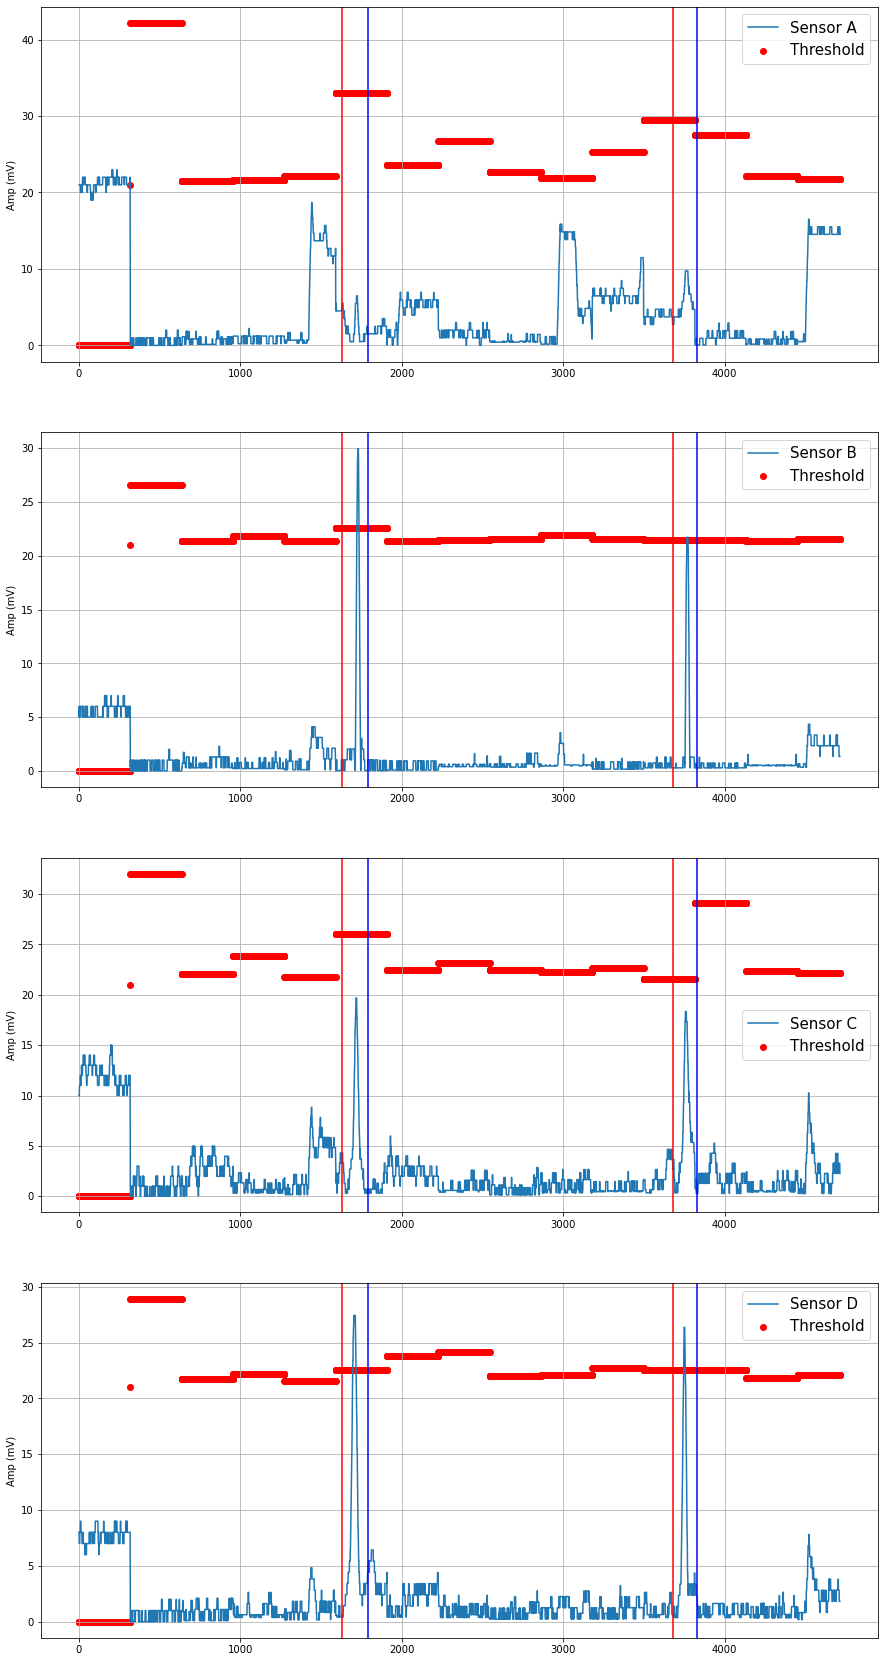

In [18]:
plt.figure(figsize=(15,30))
j=0
letter = ['A', 'B', 'C', 'D']
pass_point = 0

for i in range(1,5):
    plt.subplot(4, 1, i)
    plt.plot(globals()['sensor{}'.format(i)][pass_point:], label='Sensor %c'%letter[i-1])
    plt.scatter(np.arange(0,len(globals()['Test_threshold{}'.format(i)])), globals()['Test_threshold{}'.format(i)], c='r')    
    plt.ylabel('Amp (mV)')
    plt.grid(True)
    plt.scatter(0,0,c ='r', label='Threshold')
    plt.legend(fontsize=15)
    
    
    for j in range(len(Final_frame)):
        plt.axvline(Final_frame[j][0], color='r')
        plt.axvline(Final_frame[j][1], color='b')


plt.show() 

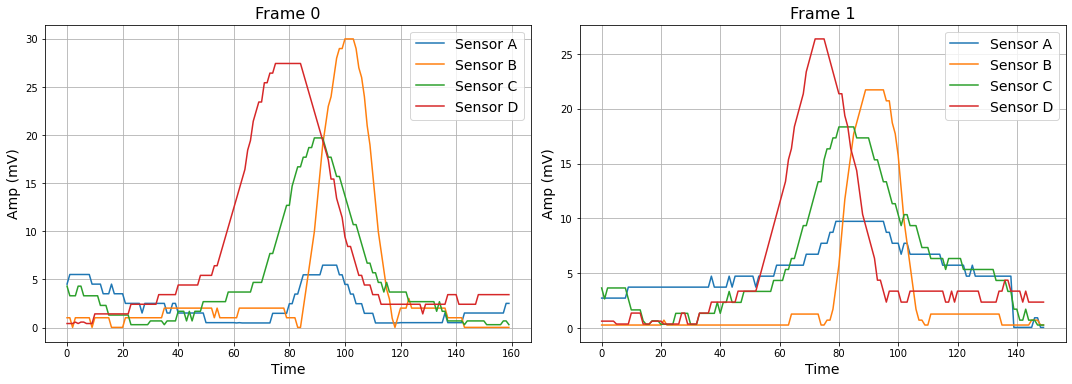

In [19]:
plt.figure(figsize=(15,len(Final_frame)*5))
j=0
pass_point = 0

for i in range(len(Final_frame)):
    plt.subplot(len(Final_frame), 2, i+1)
    plt.plot(sensor1[Final_frame[i][0]:Final_frame[i][1]], label='Sensor A')
    plt.plot(sensor2[Final_frame[i][0]:Final_frame[i][1]], label='Sensor B')
    plt.plot(sensor3[Final_frame[i][0]:Final_frame[i][1]], label='Sensor C')
    plt.plot(sensor4[Final_frame[i][0]:Final_frame[i][1]], label='Sensor D')
    plt.title('Frame %d'%i, fontsize=16)
    #plt.axvline(Final_frame[i][0], color='r')
    #plt.axvline(Final_frame[i][1], color='b')
    plt.grid(True)
    plt.ylabel('Amp (mV)', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.legend(fontsize=14)
    
plt.tight_layout()
plt.show()   